# Assessment 2

In [18]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#reading in the data for mhd
mhd_ch4 = pd.read_csv('data/mhd_ch4.csv')
mhd_co2= pd.read_csv('data/mhd_co2.csv')
mhd_n2o = pd.read_csv('data/mhd_n2o.csv')

#reading in data for tac
tac_ch4 = pd.read_csv('data/tac_ch4.csv')
tac_co2= pd.read_csv('data/tac_co2.csv')
tac_n2o = pd.read_csv('data/tac_n2o.csv')

#reading in species information
spec_info = pd.read_csv('data/species_info.csv')  
print(spec_info)
#creating dictionaries to make it easier to access data
tac_mhd = {'tac_ch4': tac_ch4, 'tac_co2': tac_co2, 'tac_n2o': tac_n2o, 'mhd_ch4':mhd_ch4, 'mhd_co2':mhd_co2, 'mhd_n2o':mhd_n2o}



  species scale units
0     co2  noaa   ppm
1     ch4   sio   ppb
2     n2o   sio   ppb


The location of this data set is Tacolneston, East Anglia.
The site code is TAC
the gas species is ch4 
the scale used is sio 
the units are ppb 


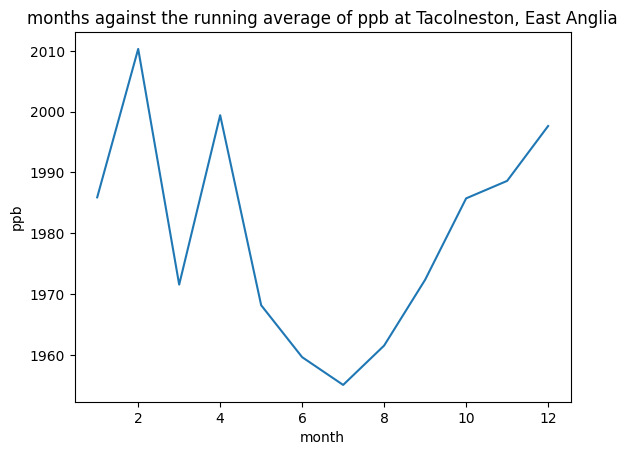

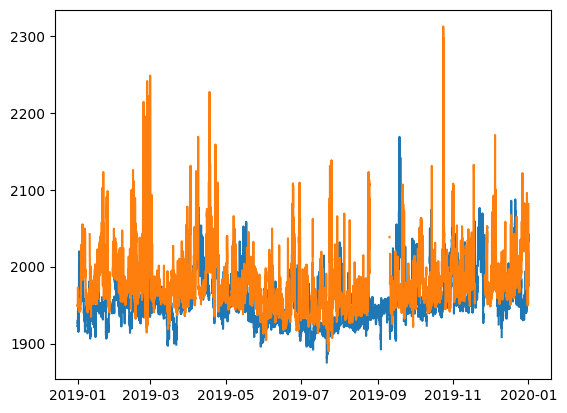

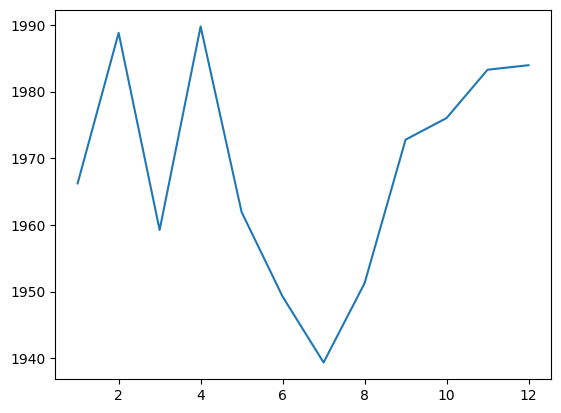

In [39]:
class Data:

   def __init__(self,data: dict, info):
      self.data = data
      self.info = info
      
   def metadata(self,file_meta):
      self.file_meta = file_meta
      self.sitecode = self.file_meta[:3]
      if self.sitecode == 'tac':
         self.sitename = 'Tacolneston, East Anglia'
      if self.sitecode == 'mhd':
         self.sitename = 'Mace Head, W. coast of the Republic of Ireland'
      
      row = self.info.loc[self.info['species'] == self.file[4:]]
      
      self.gas_species = row.iloc[0]['species']
      self.cali_scale = row.iloc[0]['scale']
      self.units = row.iloc[0]['units']

      return self.sitename, self.gas_species, self.cali_scale, self.units

   def user_metadata(self,file_meta_user):
      self.file_meta_user = file_meta_user
      self.sitecode_u = self.file_meta_user[:3]
      if self.sitecode_u == 'tac':
         print('The location of this data set is Tacolneston, East Anglia.\nThe site code is TAC')
         self.sitename_u = 'Tacolneston, East Anglia'
      if self.sitecode_u == 'mhd':
         print('The location of this data set is Mace Head, W. coast of the Republic of Ireland.\nThe site code is MHD')
         self.sitename_u = 'Mace Head, W. coast of the Republic of Ireland'
      
      row = self.info.loc[self.info['species'] == self.file_meta_user[4:]]
      
      self.gas_species_u = row.iloc[0]['species']
      self.cali_scale_u = row.iloc[0]['scale']
      self.units_u = row.iloc[0]['units']

      

      print(f'the gas species is {self.gas_species} ')
      print(f'the scale used is {self.cali_scale} ')
      print(f'the units are {self.units} ')
      
   def run_avg(self):
      
      df_avg = self.data[self.file]
      df_avg['time'] = pd.to_datetime(df_avg['time'])
      if self.time_frame == 'month':
            df_avg[self.time_frame] = df_avg['time'].dt.month
      elif self.time_frame == 'year':
         df_avg[self.time_frame] = df_avg['time'].dt.year
      elif self.time_frame == 'day':
         df_avg[self.time_frame] = df_avg['time'].dt.day
      else:
         print("Invalid time frame")
      grouped_df = df_avg.groupby(self.time_frame)
      avg_vals = grouped_df['mf'].mean()
      x = list(avg_vals.index)
      y  = []
      for i in x:
         y.append(avg_vals[i])
      
      return x, y
   def con_to_ppb(self,file_con):
      self.file_con = file_con
      self.file_con['units']
      
   def run_avg_2vals(self):
      
      self.df_file1 = self.data[self.file1]
      self.df_file2 = self.data[self.file2]
      self.df_file1['time'] = pd.to_datetime(self.df_file1['time'])
      self.df_file2['time'] = pd.to_datetime(self.df_file2['time'])

      df_merge = pd.merge(self.df_file1, self.df_file2, on="time", how="inner")
      df_merge['sum'] = df_merge['mf_x']+df_merge['mf_y']
      df_merge['avg'] = df_merge['sum']/2
      df_merge['time'] = pd.to_datetime(df_merge['time'])
   
      df_merge['month'] = df_merge['time'].dt.month
      grouped_merge = df_merge.groupby('month')
      df_merge_mean = grouped_merge['avg'].mean().reset_index()

      x_1 = self.df_file1['time']
      y_1 = self.df_file1['mf']

      x_2 = self.df_file2['time']
      y_2 = self.df_file2['mf']

      x_3 = df_merge_mean['month']
      y_3 = df_merge_mean['avg']

      return x_1, y_1, x_2, y_2, x_3, y_3

   def plot_run_avgs(self, file, time_frame):
      self.file = file
      self.time_frame = time_frame
      Data.user_metadata(self)

      x , y = self.run_avg()
      fig, ax = plt.subplots()
      
      ax.plot(x, y)
      ax.set_xlabel(self.time_frame)
      ax.set_ylabel(self.units)
      ax.set_title(f'{self.time_frame}s against the running average of {self.units} at {self.sitename}')
      plt.show()
   
   def m_vs_t(self, file1, file2, timeframe2):
      self.timeframe2 = timeframe2
      self.file1 = file1

      self.file2 = file2
      x_1 , y_1, x_2, y_2, x_3, y_3 = self.run_avg_2vals()
      file1_site, file1_gspec, file1_cali, file1_units = self.user_metadata
      fig ,ax = plt.subplots()
      ax.set_xlabel()
      ax.plot(x_1, y_1)
      ax.plot(x_2, y_2)
      fig ,ax = plt.subplots()
      ax.plot(x_3, y_3)
      
      



   
data_tac_mhd = Data(tac_mhd,spec_info)

data_tac_mhd.plot_run_avgs('tac_ch4', 'month')

data_tac_mhd.m_vs_t('mhd_ch4', 'tac_ch4', 'month')

In [ ]:
# class Data:
#  def __init__(self,data: dict):
#     self.tac_ch4 = data['tac_ch4']
    
#  def tac_metadata(self,species):
#     print(self.species)
# data_tac = Data(tac_mhd)
# data.tac_metadata(tac_mhd['tac_ch4'])